In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

###Loading The Data

In [2]:
cars = pd.read_csv("cars_data.csv")

###Initial Inspection

In [3]:
cars.head()

,Make,Model,Year,Variant,Price,Location,Mileage
0,Honda,Civic 11th Generation,2022,Standard,7000000,Lahore,90912
1,Honda,Vezel,2014,Hybrid Z,4200000,Karachi,130726
2,Suzuki,Cultus,2015,EURO II,1630000,Lahore,120000
3,Daihatsu,Hijet,2016,Special,1900000,Karachi,126780
4,Honda,Life,2013,C,1850000,Lahore,113852


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Make      348 non-null    object
 1   Model     332 non-null    object
 2   Year      348 non-null    object
 3   Variant   303 non-null    object
 4   Price     348 non-null    object
 5   Location  331 non-null    object
 6   Mileage   348 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 19.2+ KB


In [5]:
cars.describe()

,Mileage
count,348.000000
mean,79304.479885
std,53873.076967
min,1.000000
25%,40600.000000
50%,68500.000000
75%,106000.000000
max,351497.000000


###Data Cleaning

In [7]:
cars = cars[cars["Price"] != "Call"]

# Convert price to integer
cars["Price"] = cars["Price"].astype(int)

/tmp/ipython-input-7-3520432915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["Price"] = cars["Price"].astype(int)


In [10]:

# Convert price to integer
cars["Mileage"] = cars["Mileage"].astype(int)

/tmp/ipython-input-10-1640102453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["Mileage"] = cars["Mileage"].astype(int)


In [11]:
cars = cars[cars['Make'] != 'Unknown']


In [20]:
cars.iloc[70:80] #unknown rows removed

,Make,Model,Year,Variant,Price,Location,Mileage
70,Suzuki,Bolan,2016,VX Euro II,1210000,Lahore,40000
71,Suzuki,Alto,2021,VXL AGS,2690000,Lahore,60000
89,Honda,City 5th (GM2) Generation,2013,Aspire 1.5 i-VTEC,2600000,Karachi,139208
90,Daihatsu,Mira,2022,X SA lll,3825000,Karachi,12000
91,Haval,Jolion,2025,HEV,9600000,Faisalabad,5975
92,Suzuki,Cultus,2010,VXLi,1360000,Lahore,82000
93,Honda,Vezel,2014,NaN,3500000,Karachi,114522
94,Toyota,Yaris Hatchback,2022,X,4550000,Lahore,91765
95,Toyota,Hilux,2025,Revo GR-S,174000000,Lahore,5200
96,Toyota,Corolla,2016,GLi Automatic 1.3 VVTi,4385000,Lahore,59500


In [22]:
cars['Make'] = cars['Make'].str.strip().str.upper()

cars.head()

,Make,Model,Year,Variant,Price,Location,Mileage
0,HONDA,Civic 11th Generation,2022,Standard,7000000,Lahore,90912
1,HONDA,Vezel,2014,Hybrid Z,4200000,Karachi,130726
2,SUZUKI,Cultus,2015,EURO II,1630000,Lahore,120000
3,DAIHATSU,Hijet,2016,Special,1900000,Karachi,126780
4,HONDA,Life,2013,C,1850000,Lahore,113852


In [23]:
cars['Year'] = cars['Year'].astype(int)

###Feature Engineering

In [27]:
def categorize(price):
    if price > 10000000:
        return "Premium"
    elif price > 7500000:
        return "Luxury"
    elif price >2500000:
      return "Regular"
    else:
        return "Oldie/Small"


cars['Category'] = cars['Price'].apply(categorize)

cars.head()

,Make,Model,Year,Variant,Price,Location,Mileage,Category
0,HONDA,Civic 11th Generation,2022,Standard,7000000,Lahore,90912,Regular
1,HONDA,Vezel,2014,Hybrid Z,4200000,Karachi,130726,Regular
2,SUZUKI,Cultus,2015,EURO II,1630000,Lahore,120000,Oldie/Small
3,DAIHATSU,Hijet,2016,Special,1900000,Karachi,126780,Oldie/Small
4,HONDA,Life,2013,C,1850000,Lahore,113852,Oldie/Small


###Saving data to a new file

In [28]:
cars.to_csv("cars_data_cleaned.csv", index=False)

In [30]:
df = pd.read_csv("cars_data_cleaned.csv")

In [31]:
df.head()

,Make,Model,Year,Variant,Price,Location,Mileage,Category
0,HONDA,Civic 11th Generation,2022,Standard,7000000,Lahore,90912,Regular
1,HONDA,Vezel,2014,Hybrid Z,4200000,Karachi,130726,Regular
2,SUZUKI,Cultus,2015,EURO II,1630000,Lahore,120000,Oldie/Small
3,DAIHATSU,Hijet,2016,Special,1900000,Karachi,126780,Oldie/Small
4,HONDA,Life,2013,C,1850000,Lahore,113852,Oldie/Small


###Data Visualization

/tmp/ipython-input-85-3784270574.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_cars, x='Make', y='Listings', palette='viridis')


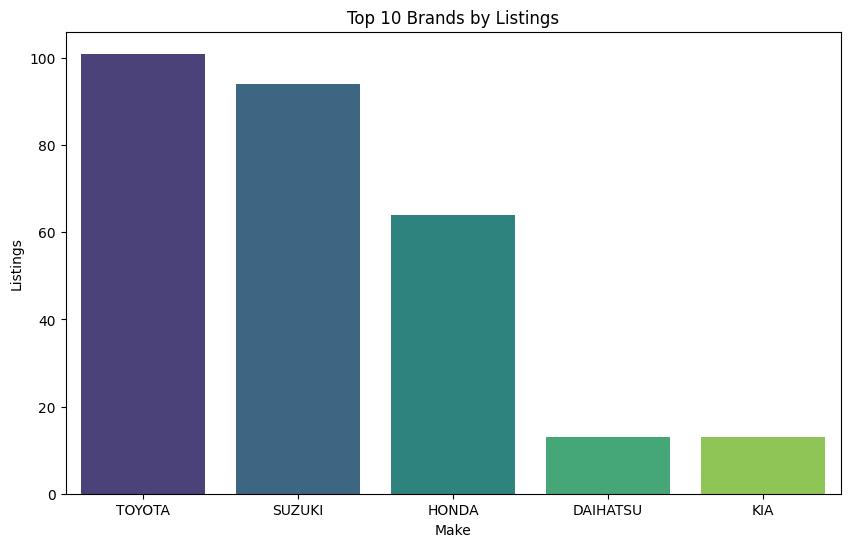

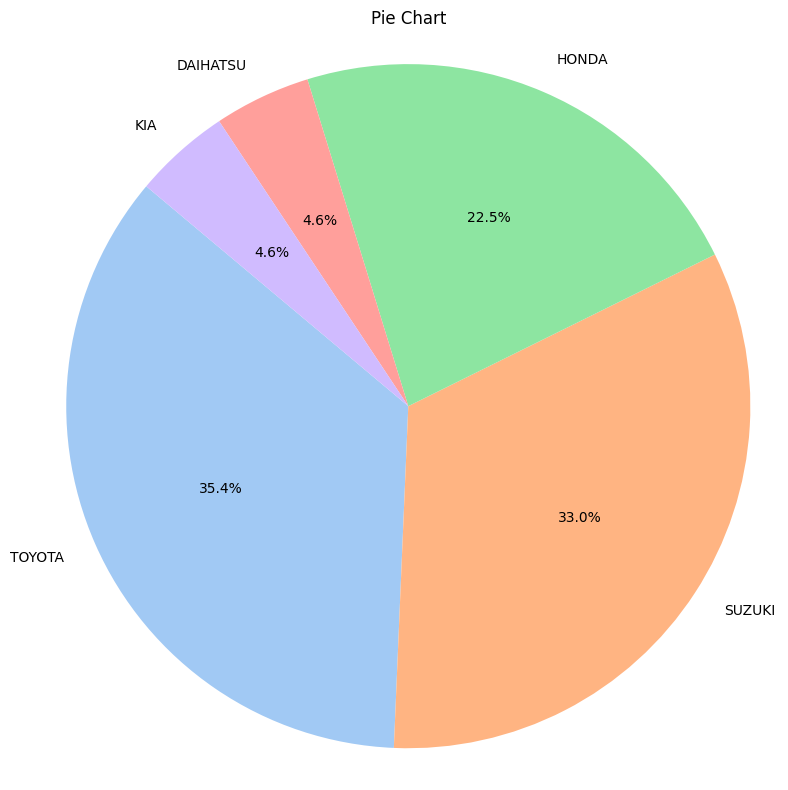

In [85]:
#Top 10 Brands with the most listings
most_cars = df.groupby("Make")["Model"].count().sort_values(ascending=False).head()
most_cars = most_cars.reset_index()
most_cars.columns = ['Make', 'Listings']

#plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=most_cars, x='Make', y='Listings', palette='viridis')
plt.xlabel("Make")
plt.ylabel("Listings")
plt.title("Top 10 Brands by Listings")

plt.figure(figsize=(8, 8))
plt.pie(most_cars["Listings"], labels=most_cars["Make"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

plt.title("Pie Chart")
plt.axis('equal')
plt.tight_layout()
plt.show()




### As expected, Toyota has the highest share in the used car market, followed by Suzuki and Honda. Emerging players like Kia show that their market is growing too.

/tmp/ipython-input-65-4004927198.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=highest_prices, x='Model', y='Price', palette='magma')


Text(0.5, 1.0, 'Most Expensive Listings')

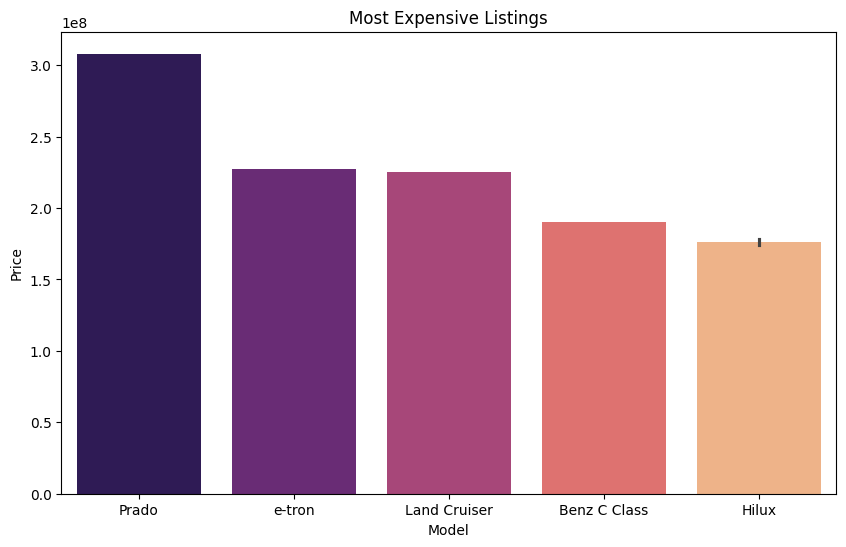

In [65]:
highest_prices = df.nlargest(10, "Price")

plt.figure(figsize=(10,6))
sns.barplot(data=highest_prices, x='Model', y='Price', palette='magma')
plt.xlabel("Model")
plt.ylabel("Price")
plt.title("Most Expensive Listings")





###Prado leads the race as expected due to high import duties and the general luxury it has. E-Tron being a premium electric vehicle, comes in at second.

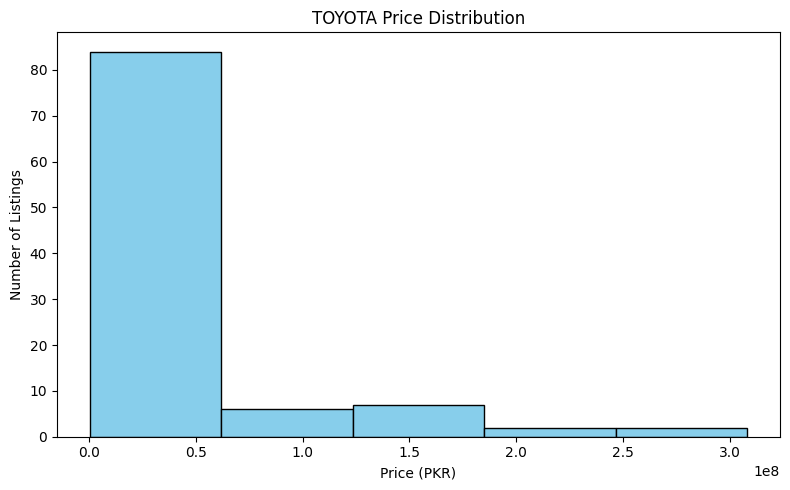

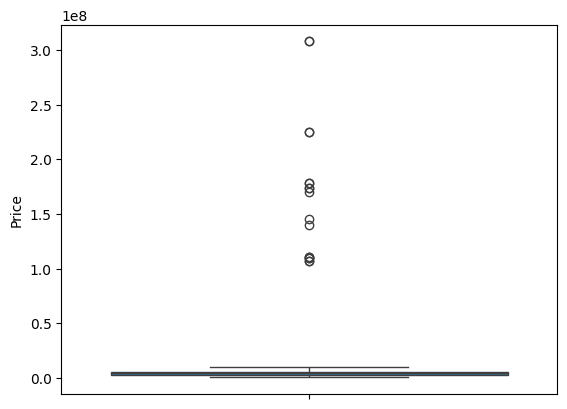

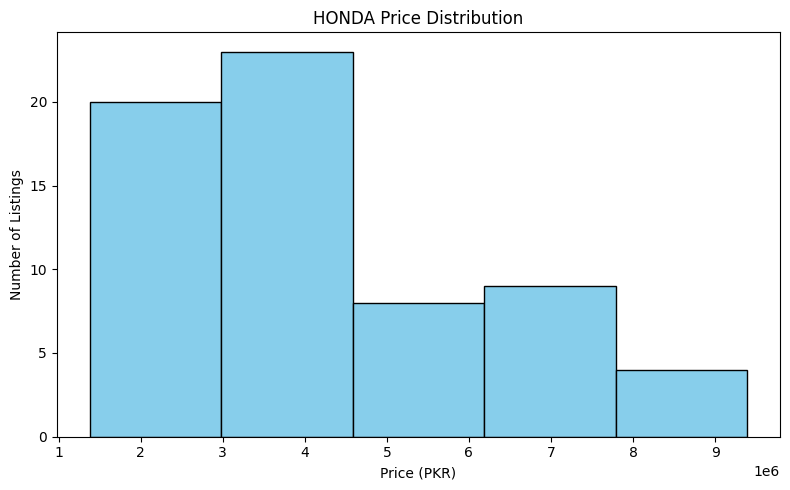

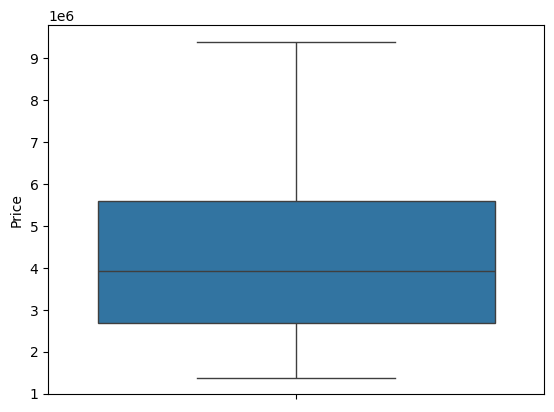

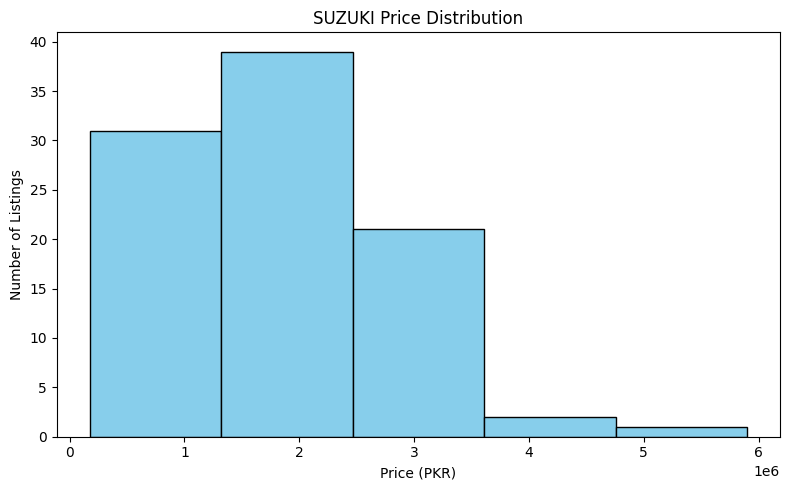

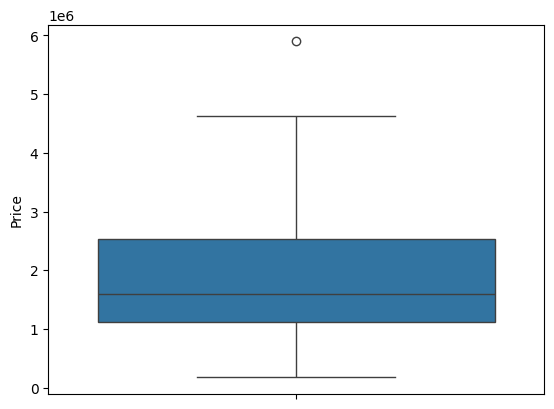

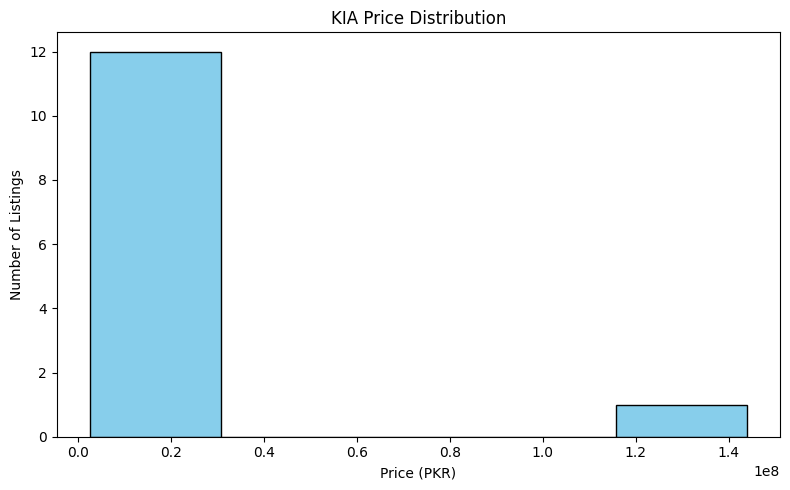

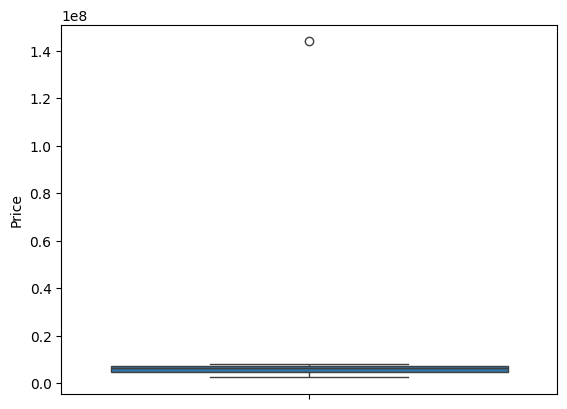

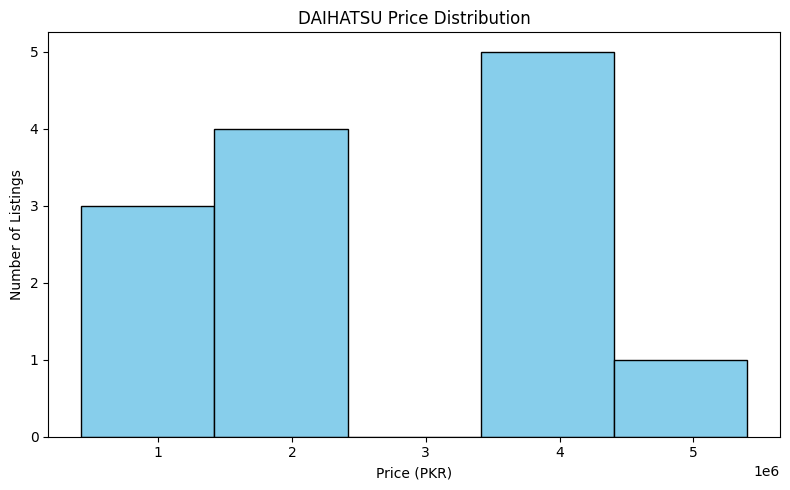

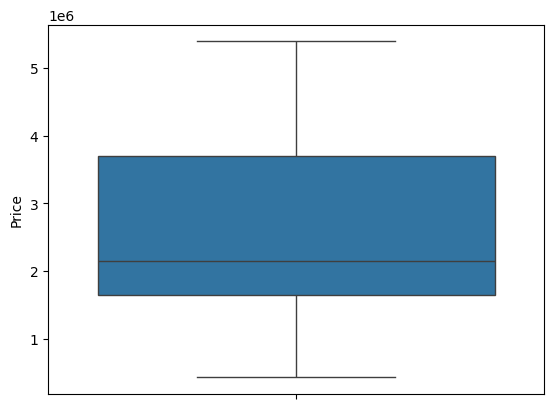

In [82]:
brands = ["TOYOTA", "HONDA", "SUZUKI", "KIA", "DAIHATSU"]
brands_df = {}
for brand in brands:
  brands_df[brand] = df[df["Make"] == brand]

brands_df["TOYOTA"].head()


for brand, brand_df in brands_df.items():
  plt.figure(figsize=(8, 5))
  plt.hist(brand_df["Price"], bins=5, color='skyblue', edgecolor='black')
  plt.title(f"{brand} Price Distribution")
  plt.xlabel("Price (PKR)")
  plt.ylabel("Number of Listings")
  plt.tight_layout()
  plt.show()

  sns.boxplot(data=brand_df, y="Price")


###It can be seen that Daihatsu's pricing is in the lowest category overall, typically because their cars offer efficiency and small size, with a small engine. Honda's pricing is the most variable, particualrly because older models from the 90's are still in the market, and are generally low price, while newer models of Civic have a good after-market.

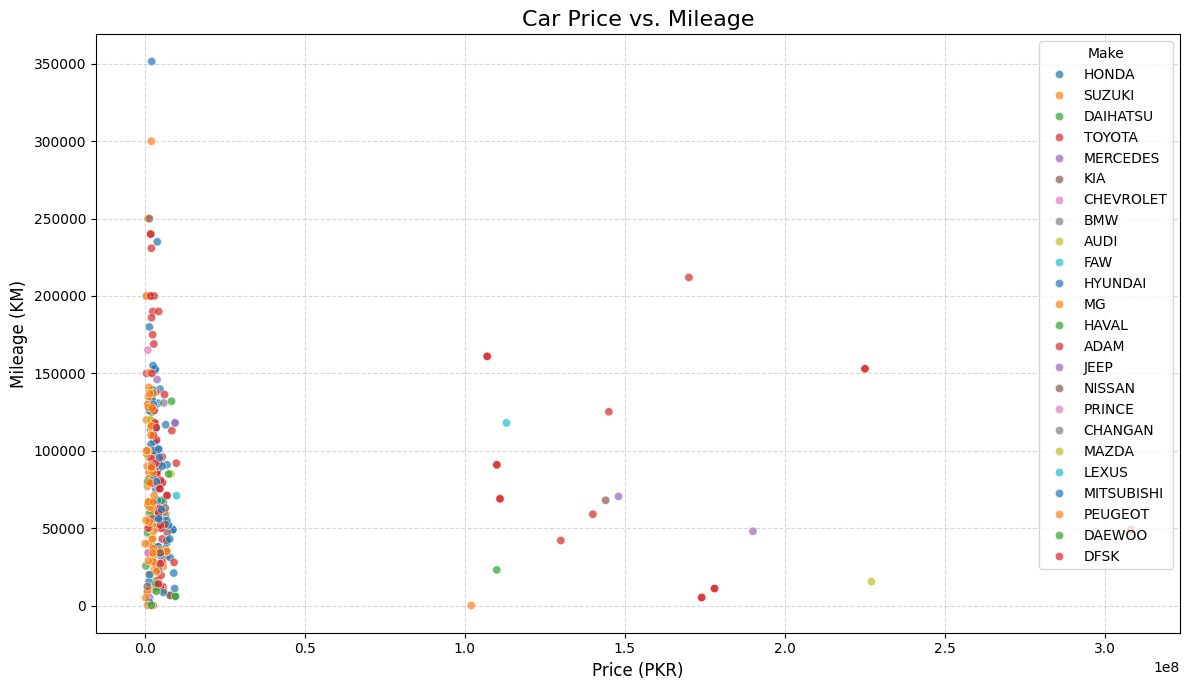

In [88]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Price', y='Mileage', hue='Make', alpha=0.7, palette='tab10', legend='brief')

plt.title("Car Price vs. Mileage", fontsize=16)
plt.xlabel("Price (PKR)", fontsize=12)
plt.ylabel("Mileage (KM)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

###A General trend here is that cars with higher mileage are typically less expensive. This can be due to the age of the car (in most cases).

/tmp/ipython-input-102-621728873.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=locations.index, y=locations.values, palette='viridis')


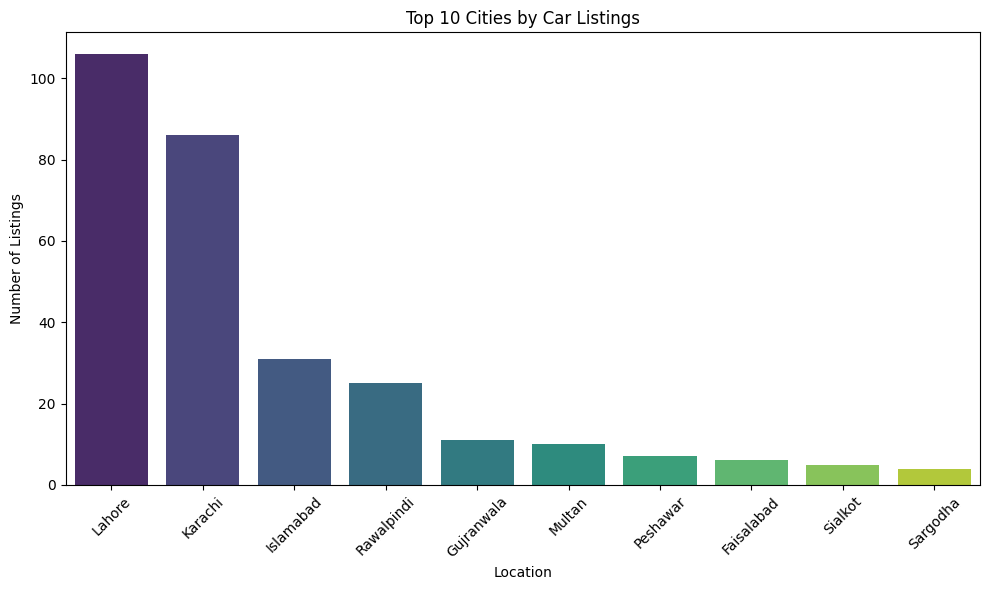

In [102]:
locations = df["Location"].value_counts().sort_values(ascending=False).head(10)
locations.head()

plt.figure(figsize=(10,6))
sns.barplot(x=locations.index, y=locations.values, palette='viridis')
plt.xlabel("Location")
plt.ylabel("Number of Listings")
plt.title("Top 10 Cities by Car Listings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###As seen, Lahore and Karachi, being the highest populated cities, have the most listings.

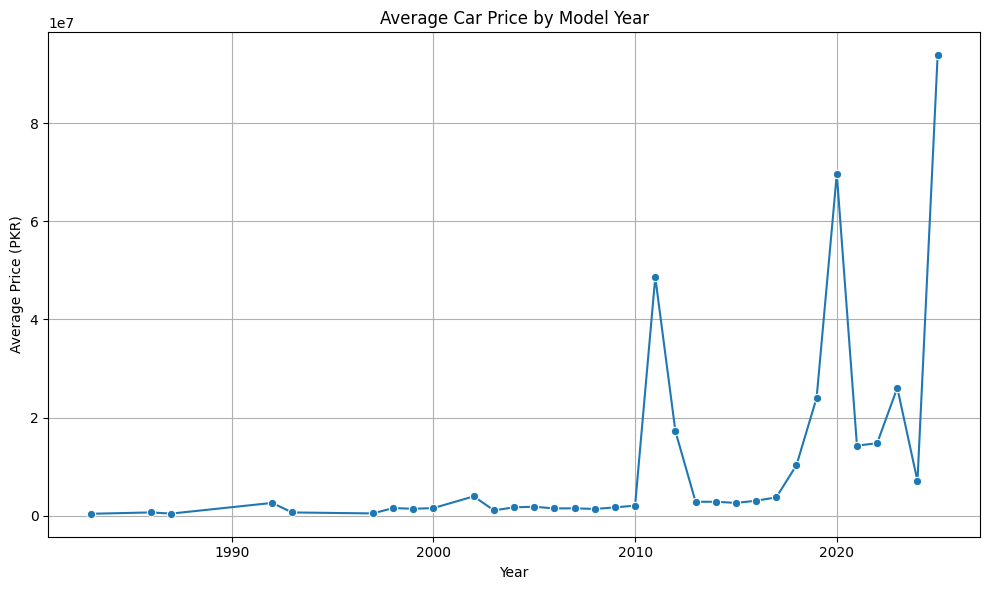

In [103]:
avg_price_by_year = df.groupby("Year")["Price"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_price_by_year, x='Year', y='Price', marker='o')
plt.title("Average Car Price by Model Year")
plt.xlabel("Year")
plt.ylabel("Average Price (PKR)")
plt.grid(True)
plt.tight_layout()
plt.show()

###An upward trend in average pricing is seen here, thanks to rising inflation, growing duties and the increasing price of newer models.

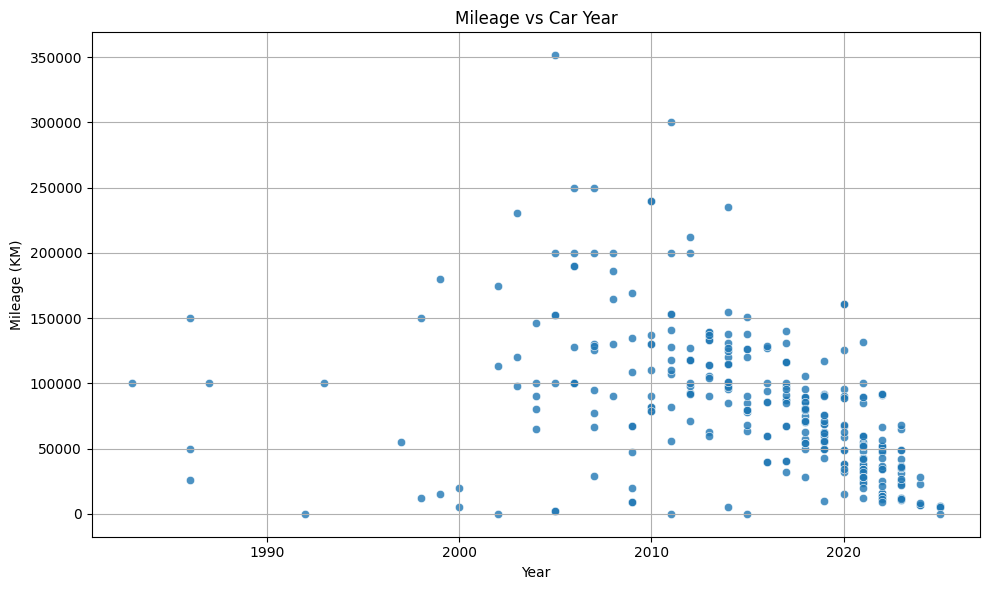

In [106]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Year", y="Mileage", alpha=0.8)
plt.title("Mileage vs Car Year")
plt.xlabel("Year")
plt.ylabel("Mileage (KM)")
plt.grid(True)
plt.tight_layout()
plt.show()

###Expected trend, as newer models typically have less mileage compared to older models.

/tmp/ipython-input-108-3131633724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_price.index, y=city_price.values, palette="cubehelix")


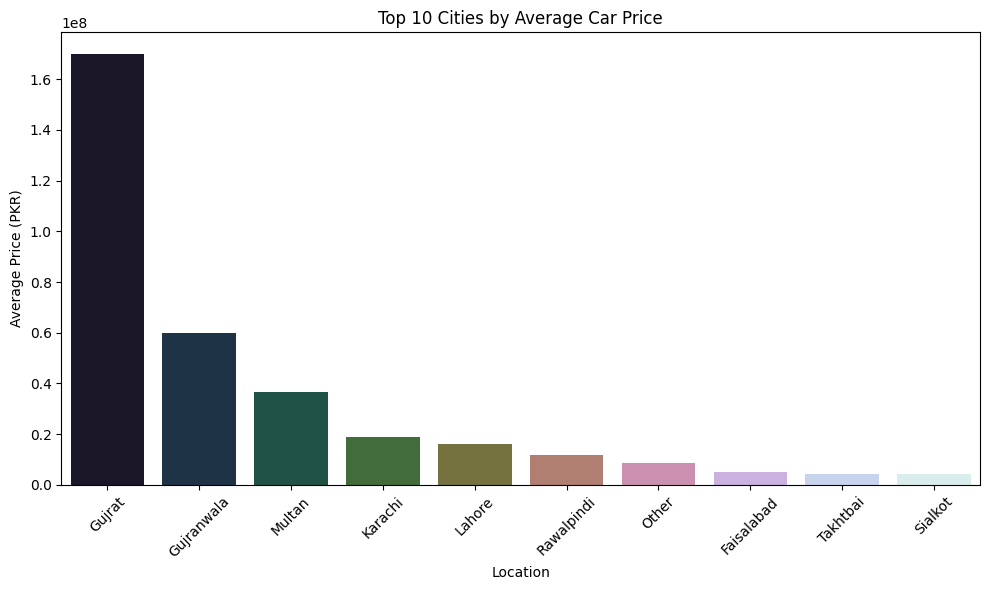

In [108]:
city_price = df.groupby("Location")["Price"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_price.index, y=city_price.values, palette="cubehelix")
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Average Car Price")
plt.ylabel("Average Price (PKR)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-116-1320115993.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_models, x="Models", y="Count", palette='magma')


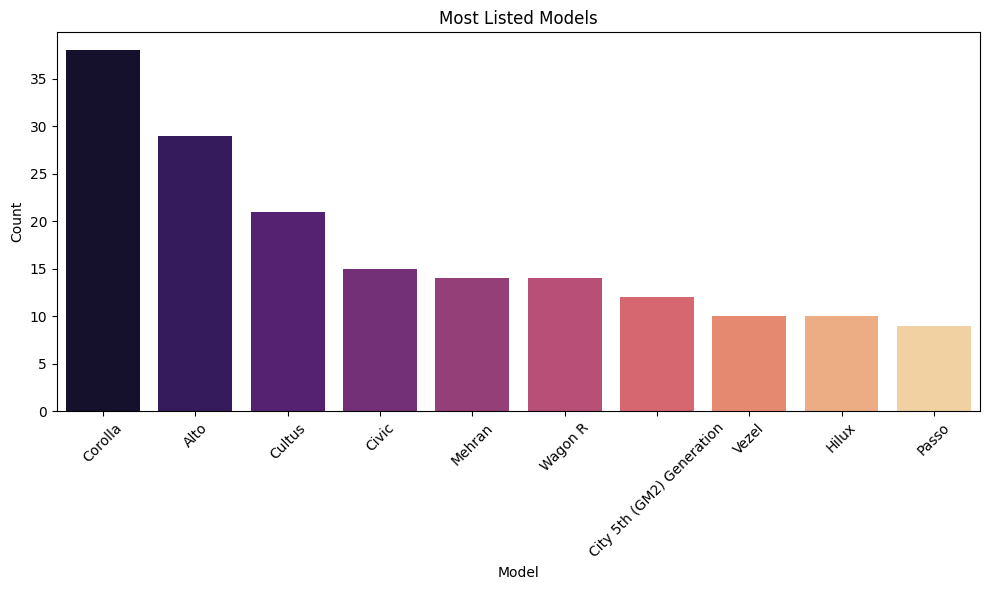

In [116]:
top_models = df["Model"].value_counts().reset_index().head(10)
top_models.columns = ['Models', 'Count']


plt.figure(figsize=(10,6))


sns.barplot(data=top_models, x="Models", y="Count", palette='magma')
plt.xticks(rotation=45)
plt.title("Most Listed Models")
plt.xlabel("Model")
plt.ylabel("Count")
plt.tight_layout()


plt.show()

###Corolla leads this chart, with the most listings, due to its ruggedness and it being a general fan favorite. Suzuki's Alto and Cultus follow, both cars have decent comfort with high fuel efficiency.

#Conclusion

This project explored real-world car listing data scraped from PakWheels, uncovering key insights into Pakistan’s used car market. By analyzing price trends, mileage patterns, and brand popularity, we observed that:

- Toyota, Suzuki, and Honda dominate the market by listing volume.

- Premium brands like Lexus and Mercedes appear in higher price tiers with fewer listings.

- Mileage and price are loosely correlated, though variants, year, and condition likely play a bigger role.

- Major cities like Karachi, Lahore, and Islamabad lead in listing volume and price variability.

Through this hands-on project, I applied data collection (Selenium), data wrangling (Pandas), and exploratory visualization (Matplotlib/Seaborn) to extract meaningful patterns from a messy, dynamic dataset, a crucial skill in any data science workflow.